In [1]:
%matplotlib inline
import numpy as np
import yfinance as yf
from arch import arch_model

import matplotlib.pyplot as plt
plt.rc("figure", figsize=(16, 6))
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

In [2]:
data = yf.download("AAPL", start="2020-01-01", end="2022-07-31")

[*********************100%***********************]  1 of 1 completed


In [3]:
adjusted_closes = data['Adj Close']
returns = 100 * adjusted_closes.pct_change().dropna()

In [7]:
model = arch_model(returns)

In [9]:
res = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2574.7416264310978
Iteration:      2,   Func. Count:     15,   Neg. LLF: 22627.16015569807
Iteration:      3,   Func. Count:     22,   Neg. LLF: 1786.8070400274119
Iteration:      4,   Func. Count:     29,   Neg. LLF: 1628.7574729208563
Iteration:      5,   Func. Count:     36,   Neg. LLF: 1391.356540364805
Iteration:      6,   Func. Count:     42,   Neg. LLF: 1386.0237669559115
Iteration:      7,   Func. Count:     47,   Neg. LLF: 1386.0231340776968
Iteration:      8,   Func. Count:     52,   Neg. LLF: 1386.023103149895
Iteration:      9,   Func. Count:     57,   Neg. LLF: 1386.0231023247893
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1386.0231023247893
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9


In [10]:
res

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1386.02
Distribution:                  Normal   AIC:                           2780.05
Method:            Maximum Likelihood   BIC:                           2797.94
                                        No. Observations:                  648
Date:                Mon, Nov 28 2022   Df Residuals:                      647
Time:                        21:48:07   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2180  7.860e-02      2.774  5.541e-03 [6.397e-0

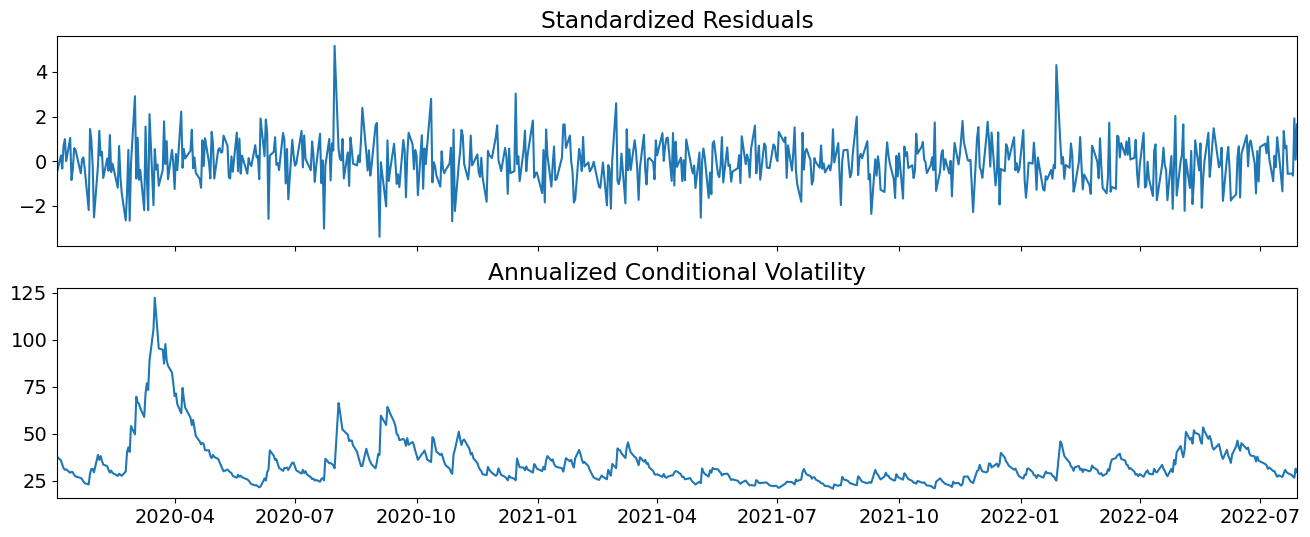

In [11]:
fig = res.plot("D")

In [16]:
# get variance forecast
forecast = res.forecast(horizon=1, reindex=False)
variance_forecast = forecast.variance.iloc[-1][0]

# compute annualized volatility forecast
volatility_forecast = np.sqrt(variance_forecast)
annualized_volatility_forecast = volatility_forecast * np.sqrt(252) / 100

In [17]:
annualized_volatility_forecast

0.32961122156629435

In [18]:
variance_forecast

4.3112522770803485